<a href="https://colab.research.google.com/github/azelia-choi/ITB2022/blob/main/ITB_%EC%9D%80%ED%96%89_%E1%84%80%E1%85%A1%E1%84%8B%E1%85%B5%E1%86%B8%E1%84%8C%E1%85%A1_%E1%84%8B%E1%85%B5%E1%84%90%E1%85%A1%E1%86%AF%EB%A5%A0_TOTAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Part1. 데이터 및 라이브러리 불러오기💻

In [ ]:
#맥북 폰트 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ITB/churn.csv")

In [ ]:
!pip install mglearn 
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#필요한 라이브러리 import
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from scipy import stats
import mglearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
sns.set_theme(style="ticks", palette="pastel")

In [ ]:
plt.rc('font', family='NanumBarunGothic') 

#Part2. 데이터 탐색 💁

## Churn : 가입자 이탈률


*   가입자 이탈률 분석은 고객 이탈 가능성이 가장  높은 사람을 예측하는 과정
- 기존 고객을 유지하는 것이 새로운 고객을 발굴하는 것보다 쉽고 비용도 적게 들음 (관련 자료 더 찾아봐야 할 듯) 

*   카드사 및 은행권에서는 고객 이탈률이 활발하게 분석되고 있음
- 이탈률 분석을 통한 이탈방지를 통해 은행은 충성도를 높일 수 있는 프로그램 및 캠페인을 개발하여 최대한 많은 고객을 유지할 수 있음
- 군집 분석을 통해 각 군집의 특성을 알아보고, 군집에 맞는 맞춤화된 프로그램 및 캠페인을 제안할 수 있음



- 신한카드 ‘예언 마케팅’ 카드해지율 20%P 줄여 (https://www.mk.co.kr/news/economy/6545402)

*   교수님이 수업시간에 언급하신 신한은행 빅데이터 분석 해커톤 대회 / NH 투자증권 빅데이터 경진대회를 통해 금융권 고객 데이터를 분석하는 것에 관심을 가지게 됨 -> 고객 이탈률 분석을 통해 추후에 금융권 데이터분석 대회에 나갈 생각이 있음 어필 (열정 어필,,)

*   최근 OTT 가입자 유지 경쟁도 치열함 (넷플릭스 이탈률 분석 등등) 이런 부분 언급하면서 이탈률 분석에 흥미를 가지게 된 과정을 초반에 언급해도 좋을 듯!! (넷플릭스, 장기 가입자 이탈률↑…구독취소 건수도 급증 : https://www.ddaily.co.kr/news/article/?no=238122) 

- http://www.koreascience.or.kr/article/JAKO200111920938465.pdf (관련논문)





In [ ]:
#원본데이터 df로 복제
df = data.copy()
print(df.shape)

(10000, 14)


In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


- Surname — 고객의 성
- CreditScore— 신용점수
- Geography— 고객의 위치 (France, Spain .. )
- Gender — 성별
- Age — 나이
- Tenure— 고객이 은행의 고객이었던 기간(년)
- Balance— 계좌 잔액
- NumOfProducts— 은행 상품 가입 수
- HasCrCard— 신용카드 보유 여부 (0 = No, 1 = Yes)
- IsActiveMember— 활동이 활발한지 여부 (0 = No, 1 = Yes)
- EstimatedSalary— 예상 급여
- Exited— 은행 이탈 여부 (0 = No, 1 = Yes)



# Part2. 전처리👀

### 데이터 알아보기

In [ ]:
print(df.info()) 
#결측치 없음
#컬럼 14개, 행 10000개

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


In [ ]:
print(df.describe()) 

         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000     

In [ ]:
#분석에 의미없는 컬럼 삭제
df = df.drop(['RowNumber','CustomerId','Surname'], axis=1)

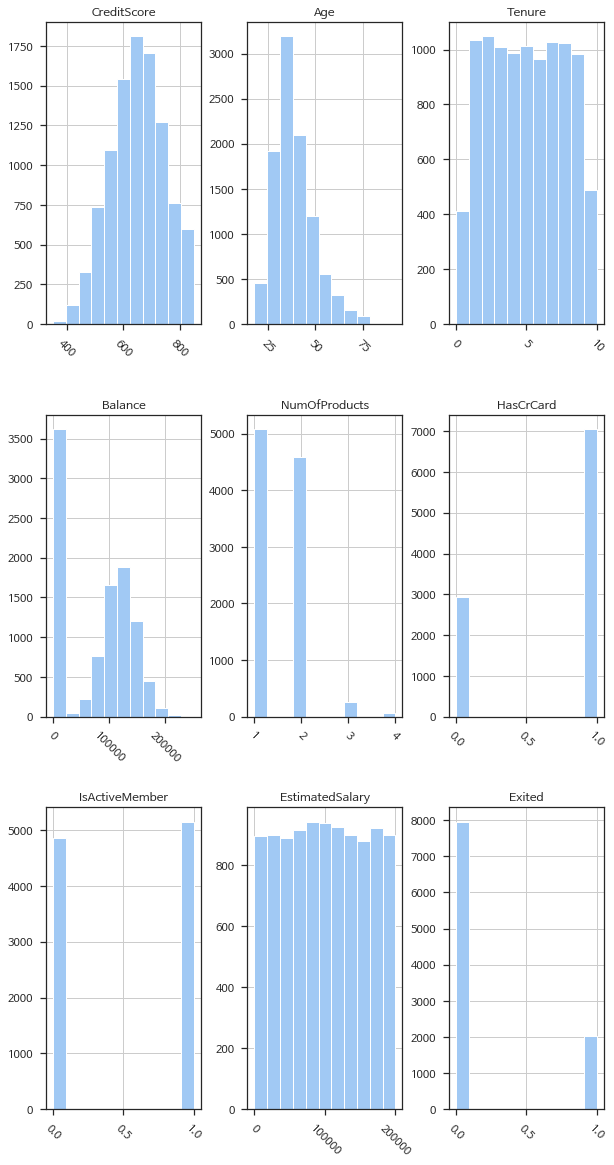

In [ ]:
df.hist(figsize=(10,20), xrot=-45,bins=11)
plt.show()

0    7963
1    2037
Name: Exited, dtype: int64


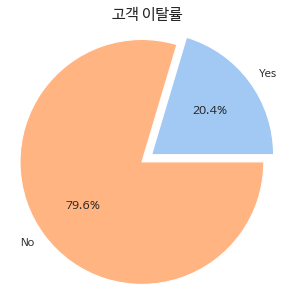

In [ ]:
print(df['Exited'].value_counts())

fig, axs = plt.subplots(figsize=(5, 5))
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]

axs.pie(sizes, explode=(0, 0.1), labels=['Yes', 'No'], autopct='%1.1f%%')
axs.axis('equal')
plt.title("고객 이탈률", size = 15)
plt.show()

#이탈고객 : 7963명
#유지고객 : 2037명

### Gender

Male      5457
Female    4543
Name: Gender, dtype: int64


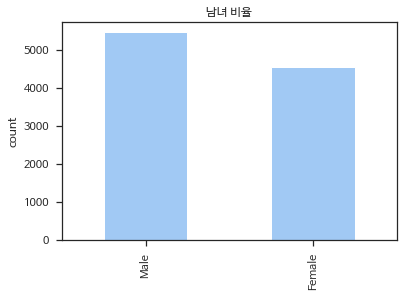

In [ ]:
print(df['Gender'].value_counts())
df['Gender'].value_counts().plot.bar()
plt.ylabel('count')
plt.title('남녀 비율')
plt.show()

#남 : 5457명
#여 : 4543명

In [ ]:
gender_sum_by_ExitedYes = df[df['Exited'] == 1].groupby('Gender').Exited.count()
gender_sum_by_ExitedNo = df[df['Exited'] == 0].groupby('Gender').Exited.count()

print(gender_sum_by_ExitedYes)
print(gender_sum_by_ExitedNo)

Gender
Female    1139
Male       898
Name: Exited, dtype: int64
Gender
Female    3404
Male      4559
Name: Exited, dtype: int64


In [ ]:
grades_order = ['Male','Female']
gender_sum_by_ExitedYes = gender_sum_by_ExitedYes.loc[grades_order]
gender_sum_by_ExitedNo = gender_sum_by_ExitedNo.loc[grades_order]

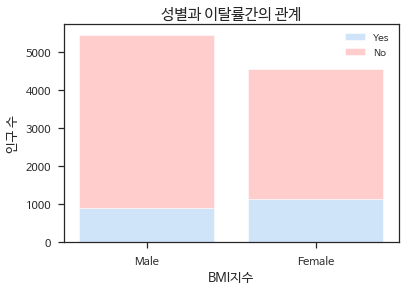

In [ ]:
alpha = 0.5

p1 = plt.bar(grades_order, gender_sum_by_ExitedYes, color='b', alpha=alpha)
p2 = plt.bar(grades_order, gender_sum_by_ExitedNo, color='r', alpha=alpha,
             bottom=gender_sum_by_ExitedYes) # stacked bar chart


plt.title('성별과 이탈률간의 관계', fontsize=15)
plt.ylabel('인구 수', fontsize=13)
plt.xlabel('BMI지수', fontsize=13)
plt.legend((p1[0], p2[0]), ('Yes', 'No'), fontsize=10)
plt.show()

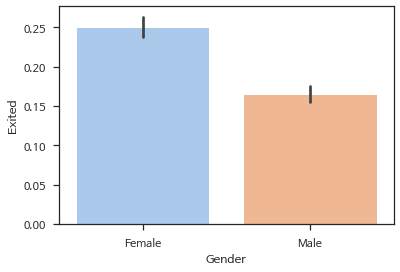

In [ ]:
sns.barplot(
    data = df,
    x = "Gender",
    y = "Exited")
plt.show()

#여성의 가입자 이탈률이 더 높다

Male      5457
Female    4543
Name: Gender, dtype: int64
Male      0.5457
Female    0.4543
Name: Gender, dtype: float64


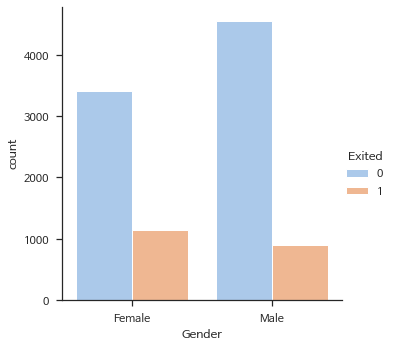

In [ ]:
print(df.Gender.value_counts())
print(df.Gender.value_counts(normalize=True))
sns.catplot(kind='count', data=df, x='Gender', hue="Exited")

- 여성 고객의 이탈 비율이 남성 고객의 이탈 비율보다 크다.

### Age

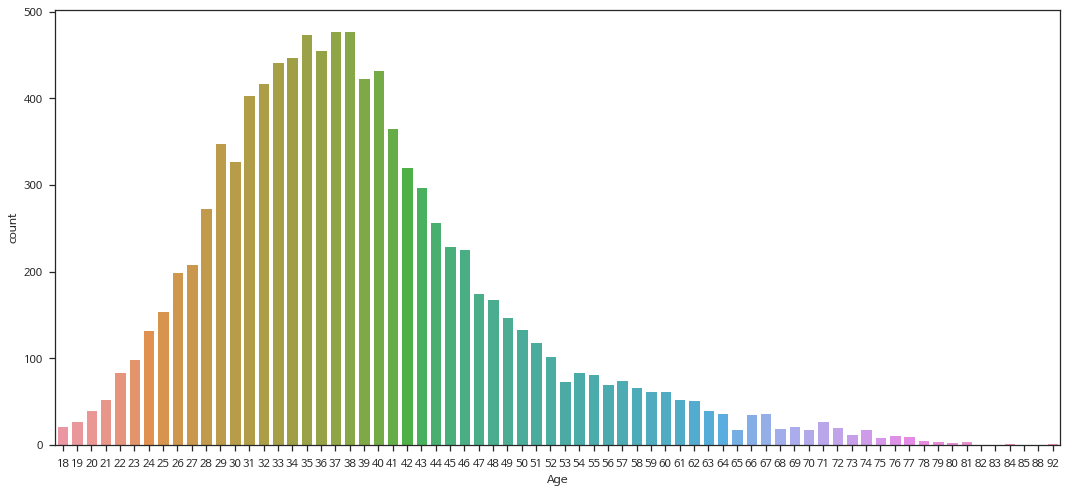

In [ ]:
plt.figure(figsize=(18, 8))
sns.countplot(x=df.Age, data=df)

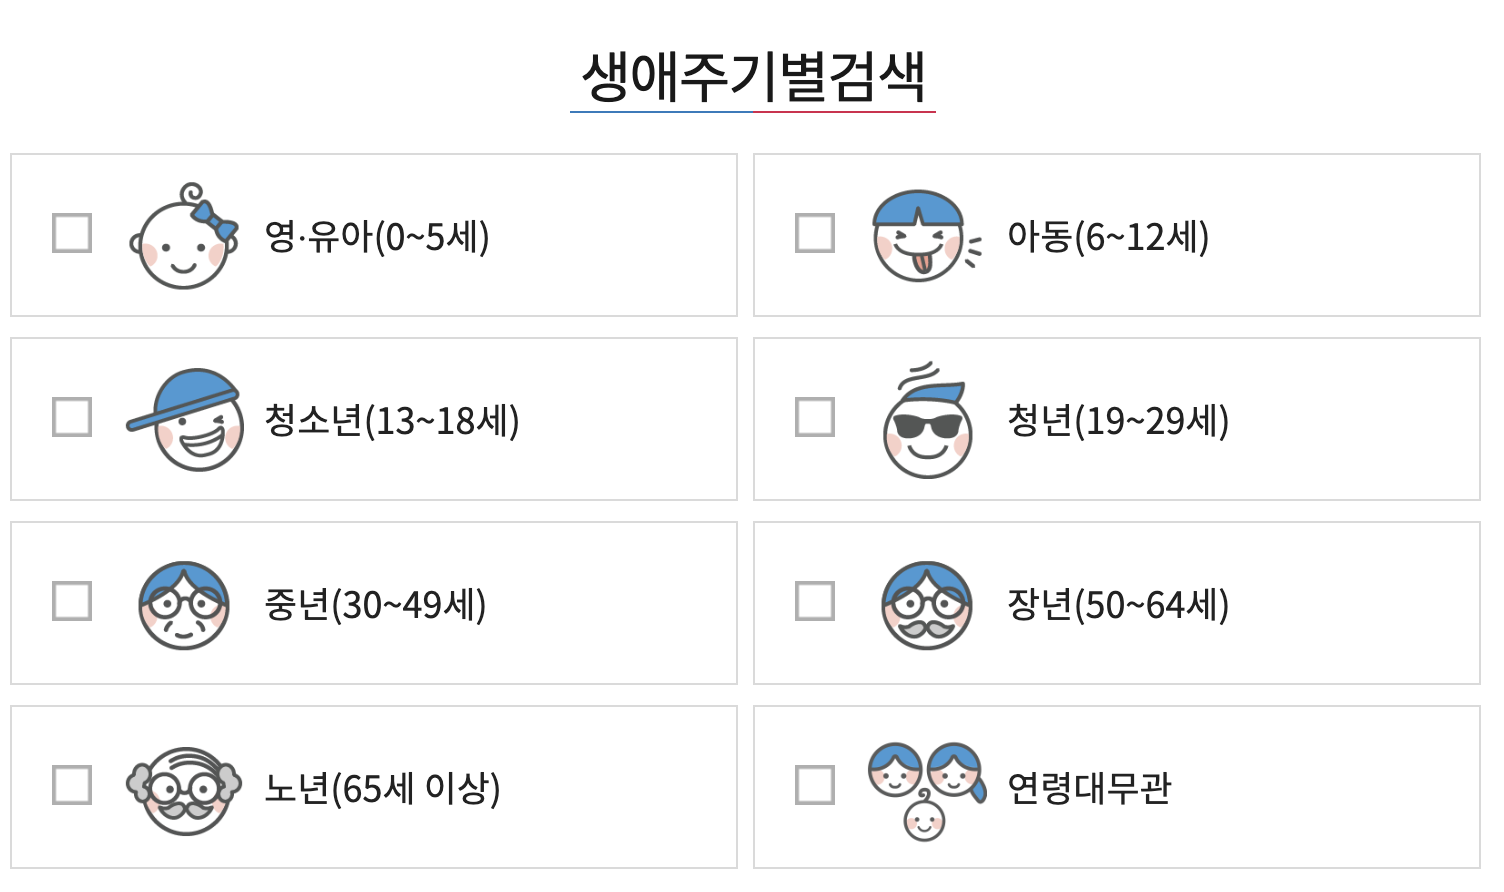

- https://www.gosims.go.kr/hh/hh001/retrieveLfcySearch.do

In [ ]:
grades = []
for row in df['Age'] : 
  if row <= 29:
    grades.append('청년')
  elif row <= 49:
    grades.append('중년')
  elif row <= 64:
    grades.append('장년')
  else:
    grades.append('노년')

df['Ageband'] = grades

중년    6964
청년    1641
장년    1113
노년     282
Name: Ageband, dtype: int64


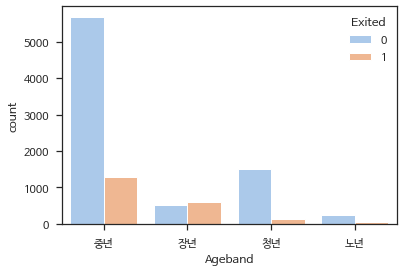

In [ ]:
print(df['Ageband'].value_counts())
sns.countplot(x='Ageband', hue = 'Exited',data = df)

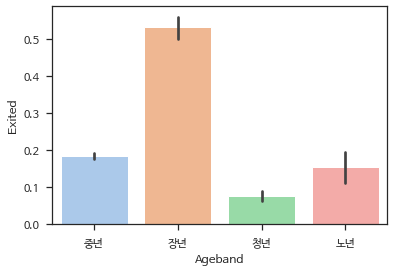

In [ ]:
sns.barplot(
    data = df,
    x = "Ageband",
    y = "Exited")
plt.show()

- 중년의 가입비율이 매우 높은 편이다.
- 청년은 가입률에 비해 이탈률이 낮은 편이다.
- 장년은 이탈률이 매우 높다.

### Geography

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


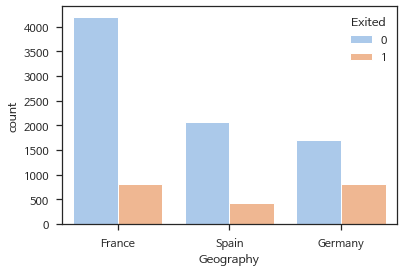

In [ ]:
print(df['Geography'].value_counts())
sns.countplot(x='Geography', hue = 'Exited',data = df)

#프랑스 : 5014명
#독일 : 2509명
#스페인 : 2477명

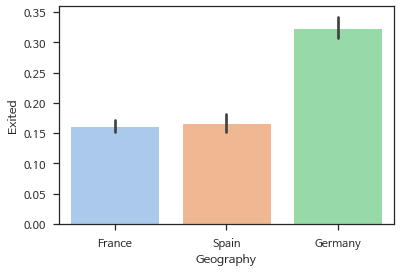

In [ ]:
sns.barplot(
    data = df,
    x = "Geography",
    y = "Exited")
plt.show()

- 독일 > 스페인 > 프랑스 순으로 고객이탈률이 높다

### Balance 

In [ ]:
df['Balance'].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

In [ ]:
#계좌잔액에 따른 이탈률을 알아보기 위해 'Balance_grades' 컬럼 추가
grades = []
for row in df['Balance'] : 
  if row <= 97198.540000:
    grades.append('Low')
  elif row <= 127644.240000:
    grades.append('High')
  else:
    grades.append('VeryHigh')

df['Balance_grades'] = grades

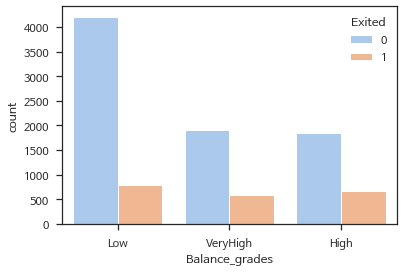

In [ ]:
sns.countplot(x='Balance_grades', data=df, hue="Exited")

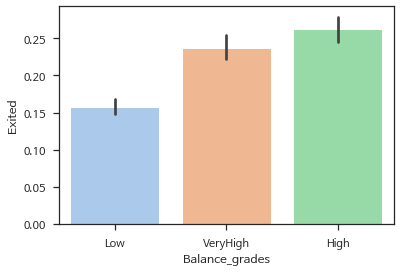

In [ ]:
sns.barplot(
    data = df,
    x = "Balance_grades",
    y = "Exited")
plt.show()

- 계좌잔액이 많을 수록 이탈률이 높아지는 경향이 있음
- 계좌잔액이 많은 고객들은 자산을 활발하게 활

### Tenure

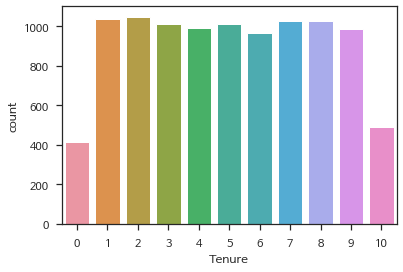

In [ ]:
sns.countplot(x='Tenure', data=df)

In [ ]:
#유지기간에 따른 이탈률을 알아보기 위해 grades 열 추가
print(df['Tenure'].describe()) 

count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64


In [ ]:
grades = []
for row in df['Tenure'] : 
  if row <= 3:
    grades.append('Very Low')
  elif row <= 5:
    grades.append('Low')
  elif row <= 7:
    grades.append('High')
  else:
    grades.append('Very High')

df['Tenure_grades'] = grades

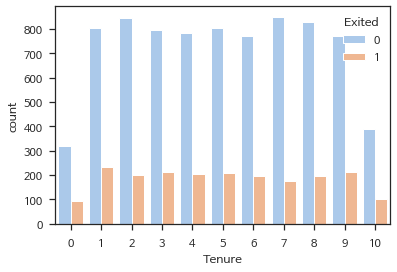

In [ ]:
sns.countplot(x='Tenure', data=df, hue="Exited")

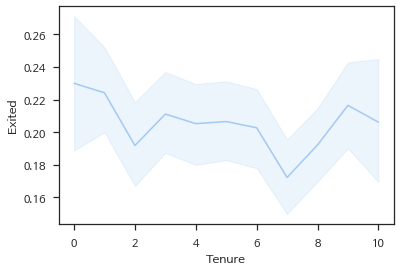

In [ ]:
sns.lineplot(
    data = df,
    x = "Tenure",
    y = "Exited")
plt.show()

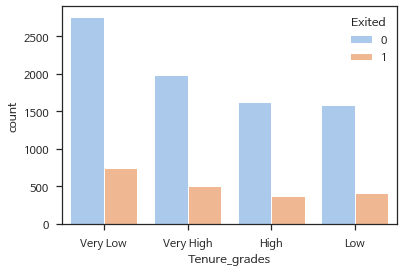

In [ ]:
sns.countplot(x='Tenure_grades', data=df, hue="Exited")

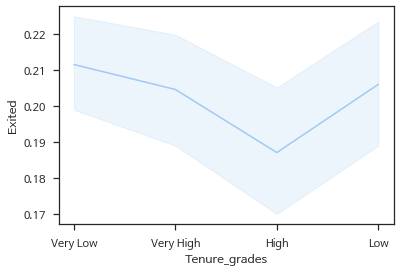

In [ ]:
sns.lineplot(
    data = df,
    x = "Tenure_grades",
    y = "Exited")
plt.show()

- 가입년수가 1년~7년까지는 가입년수가 증가할 수록 이탈률이 점점 줄어드는 경향이 있지만, 7년이 지나면서 다시 이탈률이 늘어나는 경향이 있다.

- 이자율이 낮기 때문에 옮겼을 가능성 높음

### CreditScore

In [ ]:
#신용점수에 따른 이탈률을 알아보기 위해 grades 열 추가
print(df['CreditScore'].describe()) 

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64


- 신용등급표 참고해서 grade 나눔
- 앞의 코드를 보면, max값이 850인 것을 알 수 있다. 이를 통해 아래와 같은 credit scoring ranges and models가 적용되었다고 유추함
- 출처 : https://www.forbes.com/advisor/credit-score/what-is-a-good-credit-score/

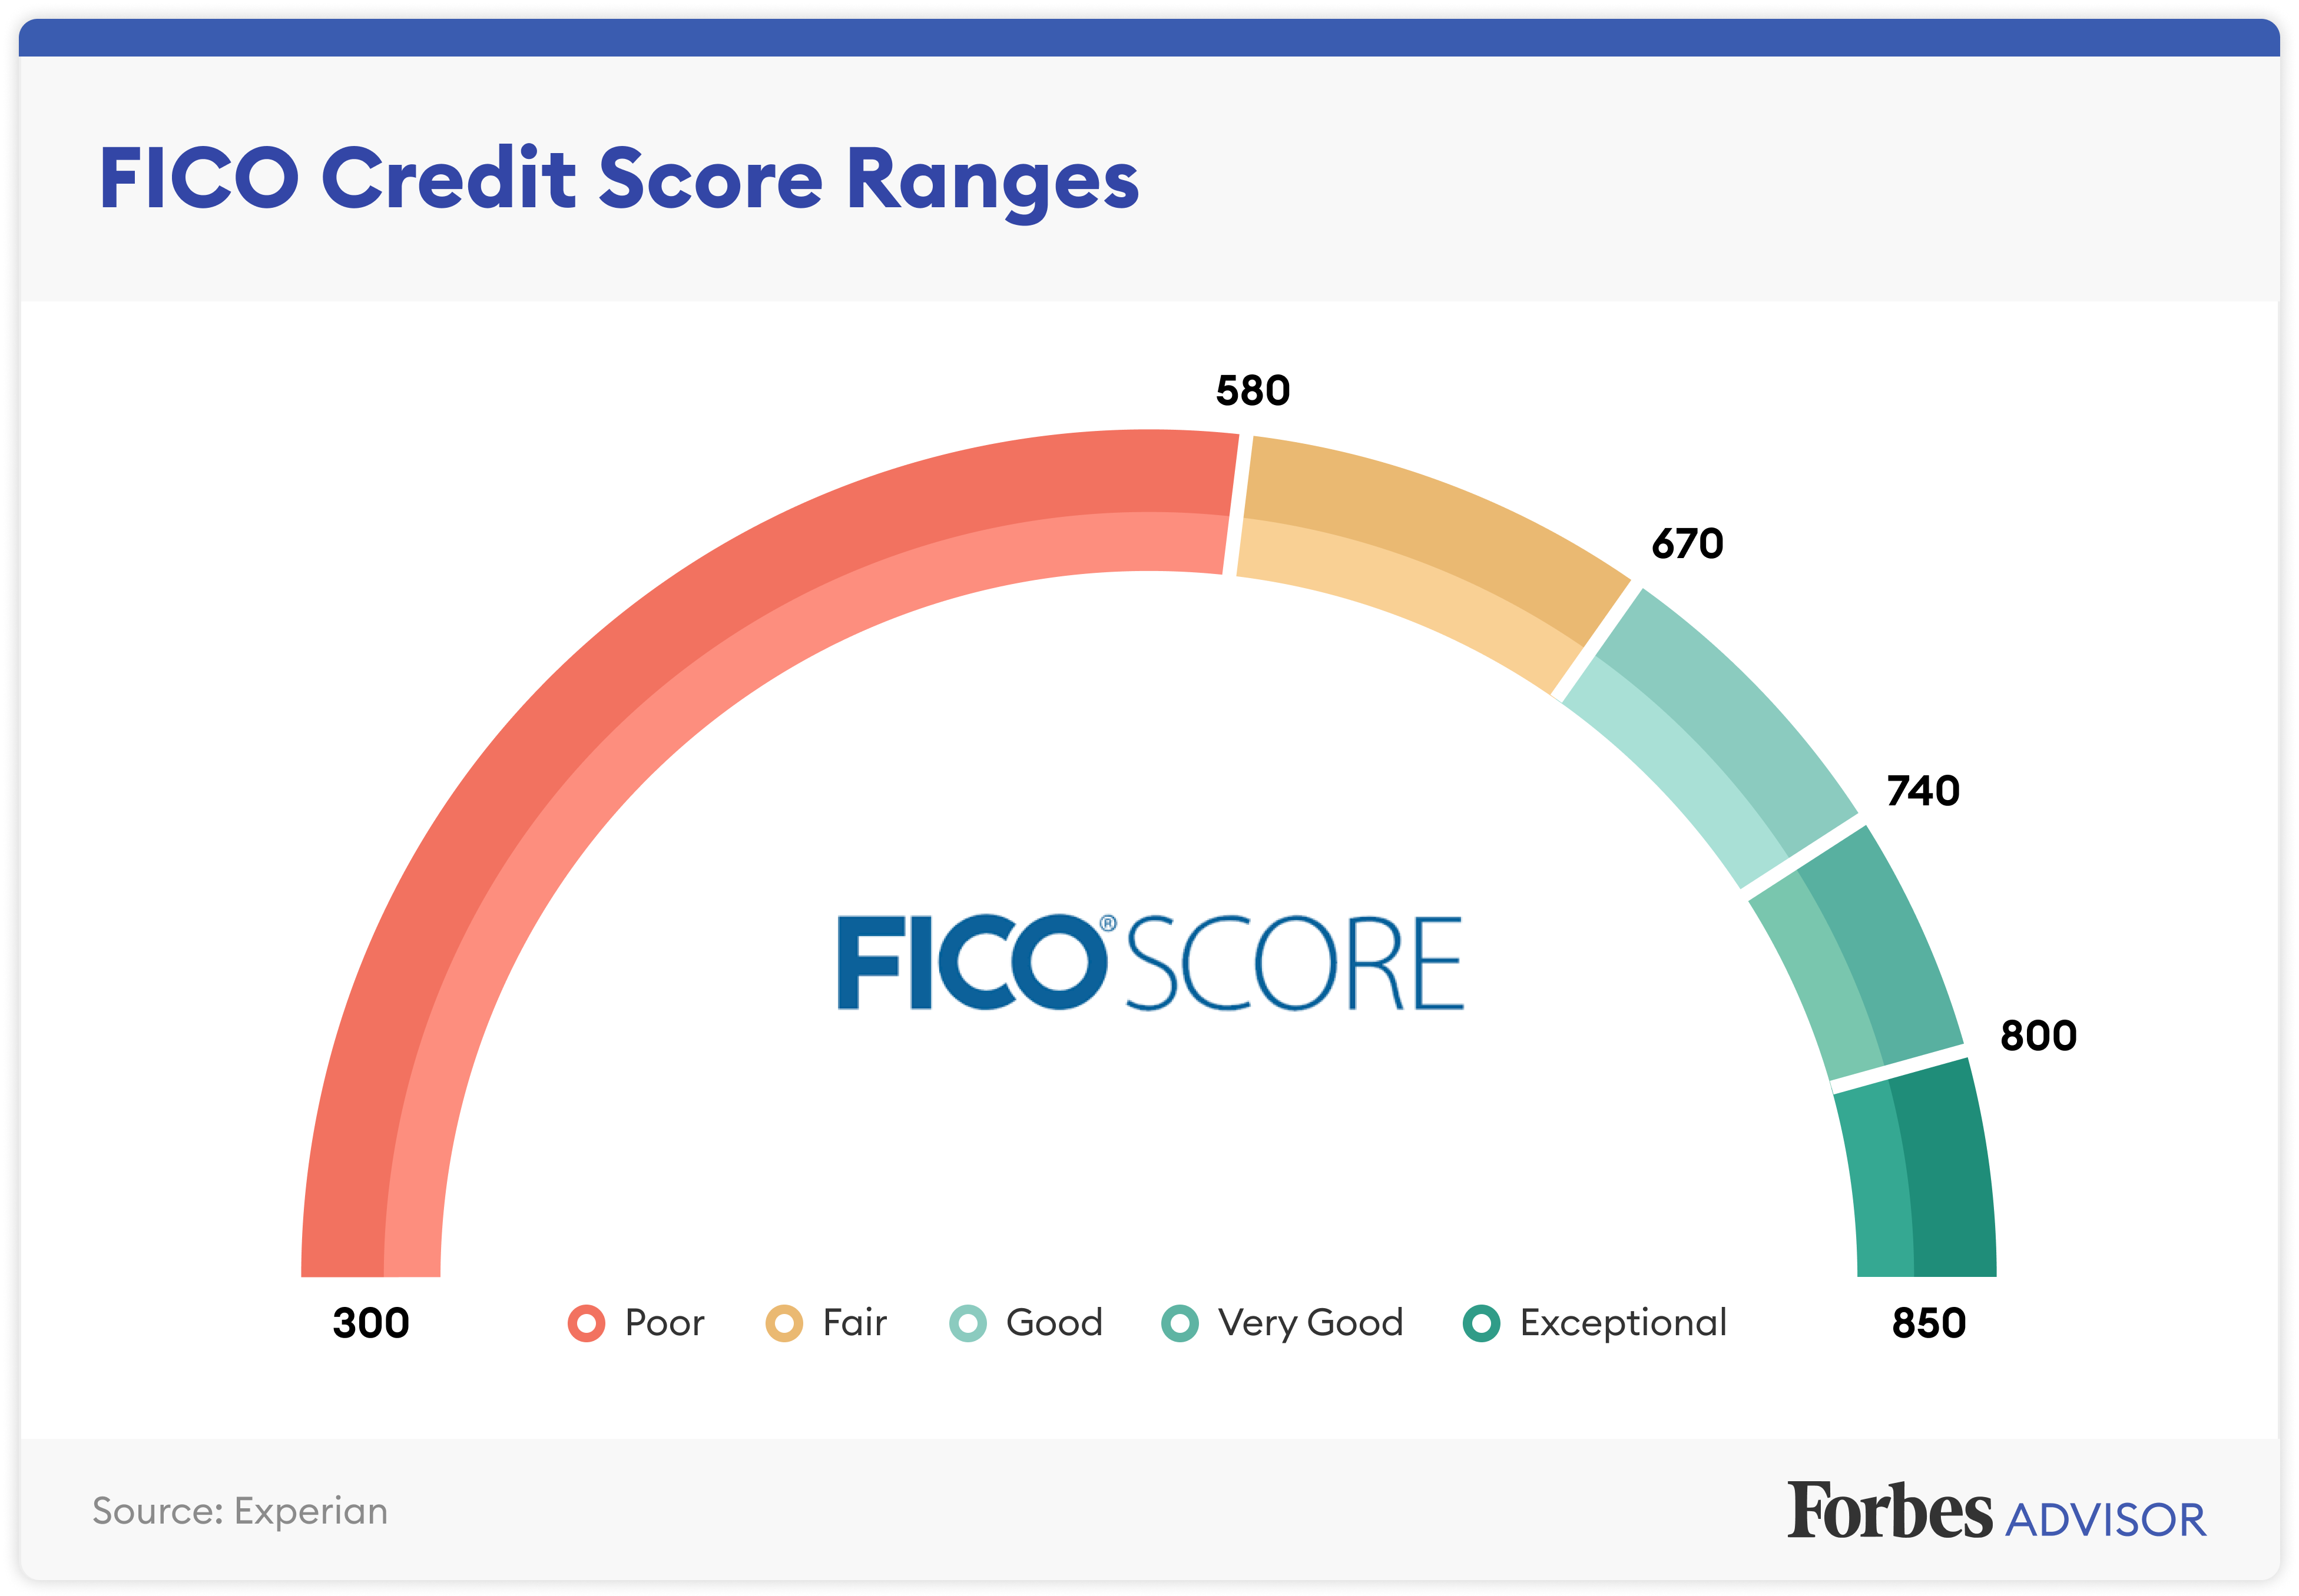

In [ ]:
grades = []
for row in df['CreditScore'] : 
  if row <= 580:
    grades.append('Poor')
  elif row <= 670:
    grades.append('Fair')
  elif row <= 740:
    grades.append('Good')
  elif row <= 800:
    grades.append('Very Good')
  else:
    grades.append('Exceptional')

df['Credit_grades'] = grades

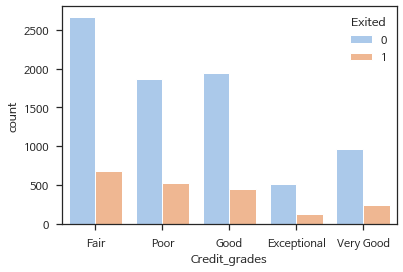

In [ ]:
sns.countplot(x='Credit_grades', data=df, hue="Exited")

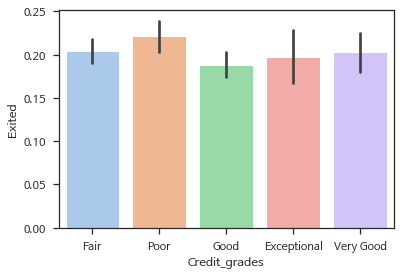

In [ ]:
sns.barplot(
    data = df,
    x = "Credit_grades",
    y = "Exited")
plt.show()

- 신용점수는 고객 이탈률에 큰 영향은 없지만, poor인 사람들의 이탈률이 다소 높음을 알 수 있음

### HasCrCard

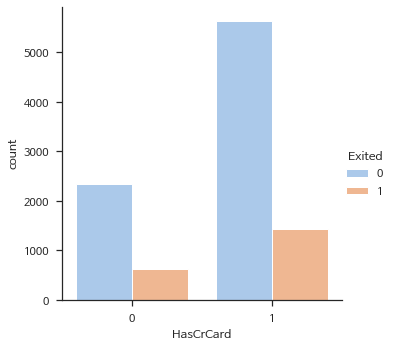

In [ ]:
sns.catplot(kind='count', data=data, x='HasCrCard', hue="Exited")

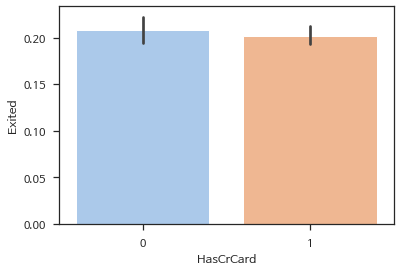

In [ ]:
sns.barplot(
    data = df,
    x = "HasCrCard",
    y = "Exited")
plt.show()

- 신용카드 보유율은 고객 이탈률과 큰 연관성이 없음

### NumOfProducts

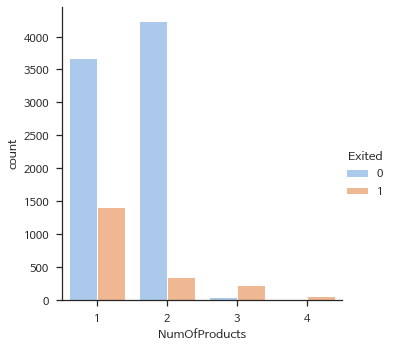

In [ ]:
sns.catplot(kind='count', data=df, x='NumOfProducts', hue="Exited")

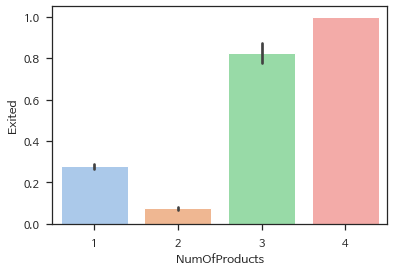

In [ ]:
sns.barplot(
    data = df,
    x = "NumOfProducts",
    y = "Exited")
plt.show()

- 은행 계좌 및 제휴제품 수가 3개 이상이면 이탈률이 매우 높음

### IsActiveMember

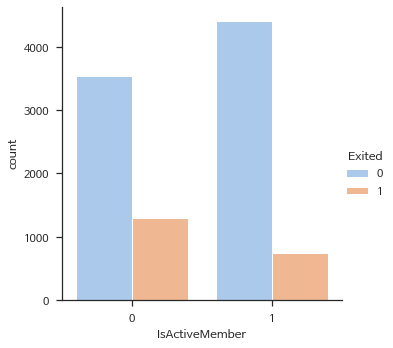

In [ ]:
sns.catplot(kind='count', data=df, x='IsActiveMember', hue="Exited")

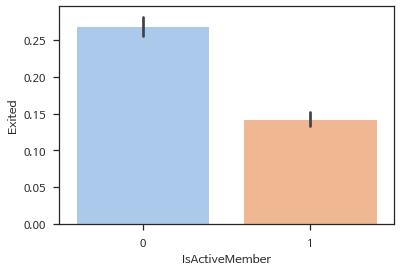

In [ ]:
sns.barplot(
    data = df,
    x = "IsActiveMember",
    y = "Exited")
plt.show()

- 활성화가 되어있지 않은 고객들이 활성화 고객보다 더 높은 비율로 이탈한다.
- 활성화가 되어있지 않은 고객의 비율이 상당히 높다. 이는 고객 이탈에 영향을 미칠 것이기 때문에 은행은 이 그룹을 활성화 고객으로 전환시키기 위해 별도의 프로그램을 시행하는 등의 마케팅 전략을 세워야한다.

### EstimatedSalary

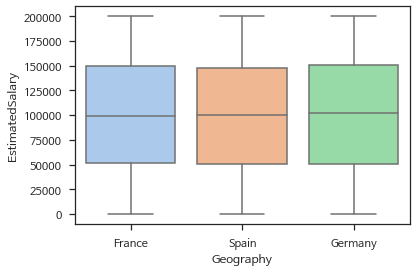

In [ ]:
sns.boxplot(y='EstimatedSalary',x = 'Geography', data=df)

In [ ]:
print(data.EstimatedSalary.describe())

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64


In [ ]:
grades = []
for row in df['EstimatedSalary'] : 
  if row <= 51002.11:
    grades.append('Very Low')
  elif row <= 100193.915:
    grades.append('Low')
  elif row <= 149388.2475:
    grades.append('High')
  else:
    grades.append('VeryHigh')

df['Salary_grades'] = grades

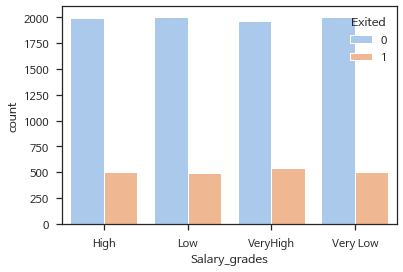

In [ ]:
sns.countplot(x='Salary_grades', 
              data=df, hue="Exited")

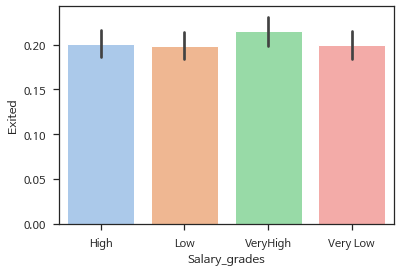

In [ ]:
sns.barplot(
    data = df,
    x = "Salary_grades",
    y = "Exited")
plt.show()

- 나라별 연봉은 차이가 거의 없음
- 연봉은 고객이탈률과 큰 연관성이 없음

## 이탈률과 연관성이 있었던 컬럼 

1.   Gender
2.   Age (Ageband)
3. Geography
4. Tenure
5. NumOfProducts
6. IsActiveMember

Text(0.5, 0.98, '이탈률에 영향을 미치는 컬럼과의 관계 파악')

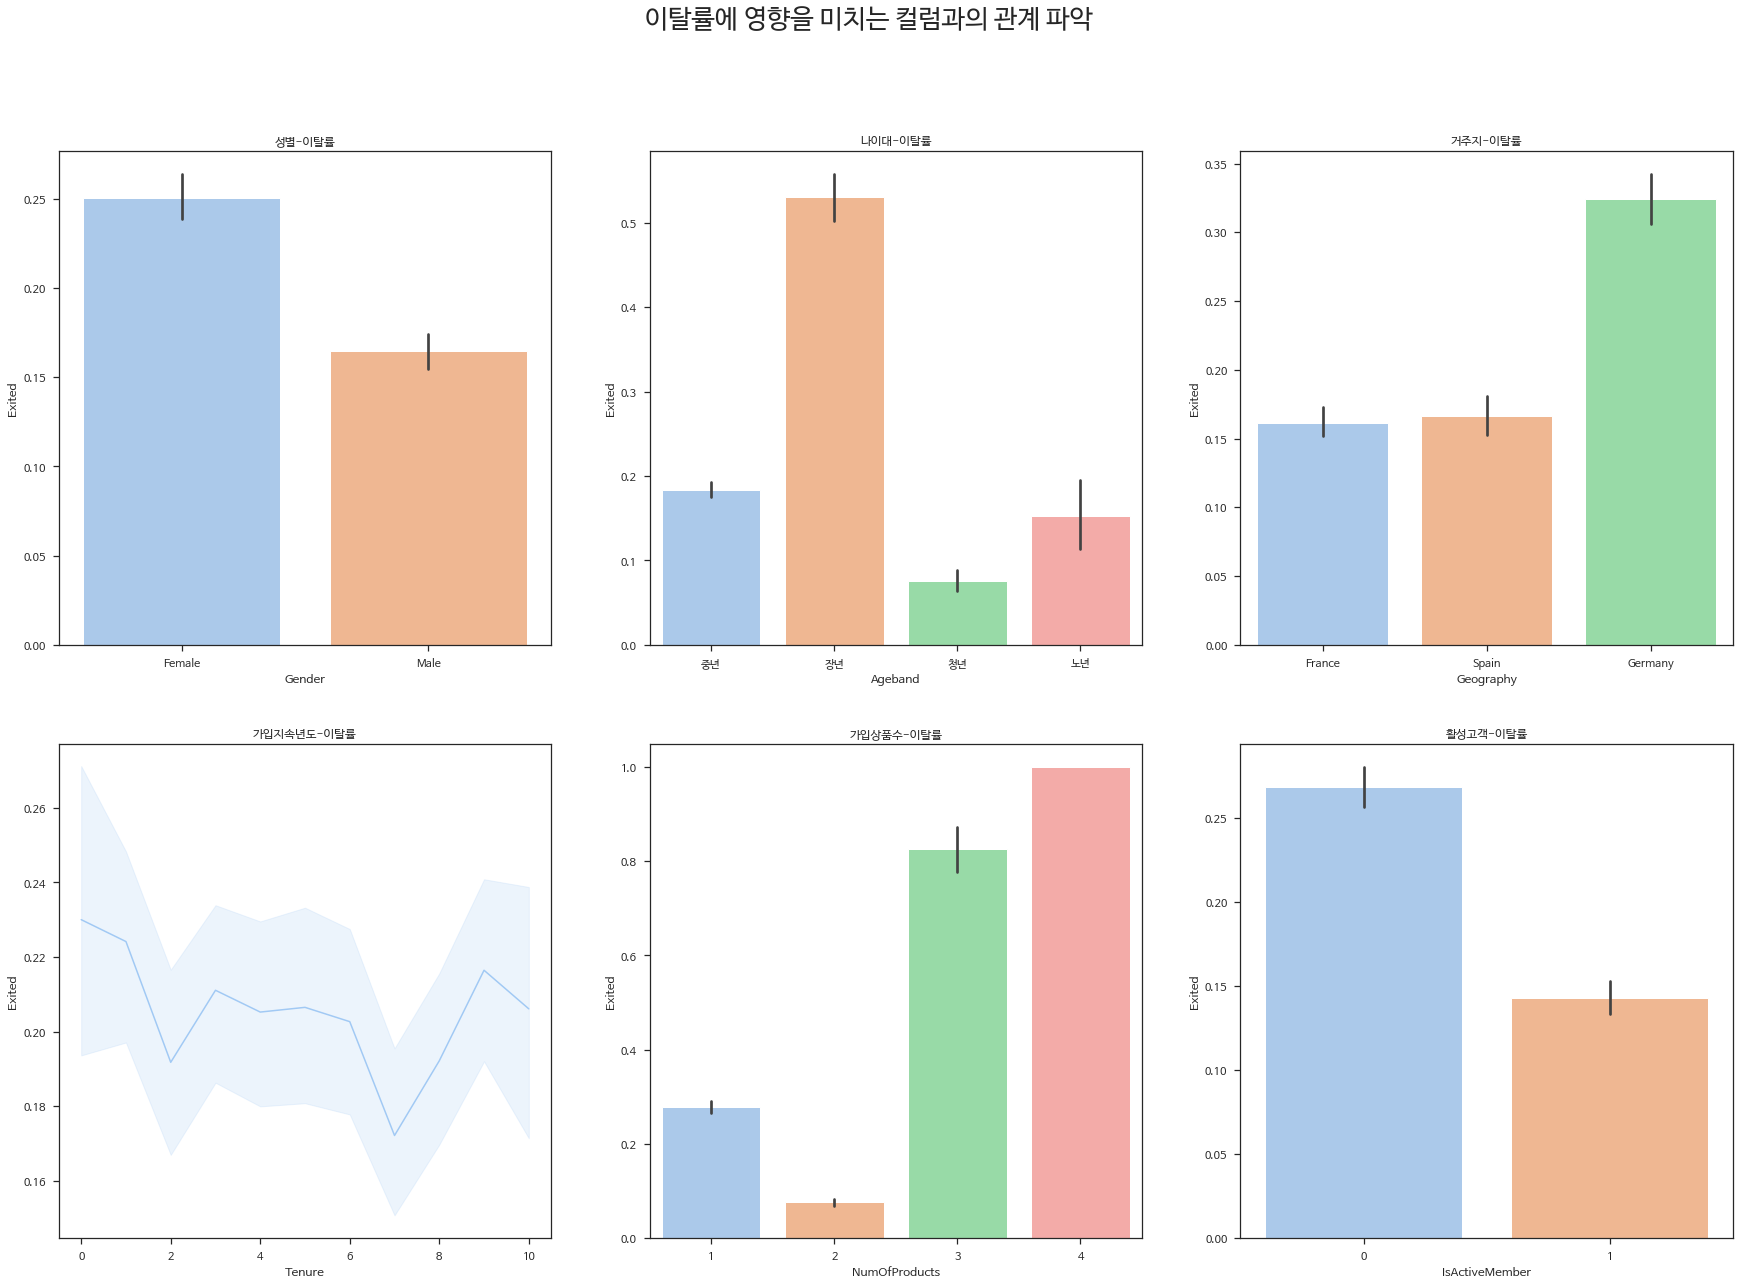

In [ ]:
#연관성이 있는 그래프 하나로 모아서 보기

fig, ax = plt.subplots(ncols=3, nrows=2,figsize=(30,20))

sns.barplot(data=df, x='Gender',y = "Exited", ax=ax[0,0])
ax[0, 0].set_title("성별-이탈률")

sns.barplot(data=df, x='Ageband',y = "Exited", ax=ax[0,1])
ax[0, 1].set_title("나이대-이탈률")

sns.barplot(data=df, x='Geography',y = "Exited",ax=ax[0,2])
ax[0, 2].set_title("거주지-이탈률")

sns.lineplot(data = df,x = "Tenure",y = "Exited",ax=ax[1,0])
ax[1, 0].set_title("가입지속년도-이탈률")

sns.barplot(data=df, x='NumOfProducts',y = "Exited", ax=ax[1,1])
ax[1, 1].set_title("가입상품수-이탈률")

sns.barplot(data=df, x='IsActiveMember',y = "Exited",ax=ax[1,2])
ax[1, 2].set_title("활성고객-이탈률")

fig.suptitle('이탈률에 영향을 미치는 컬럼과의 관계 파악', fontsize=26)

# Part3. 모델 돌리기🥸

In [ ]:
print(df.columns)

df_new = df.drop(['CreditScore','Age','Balance','EstimatedSalary','Tenure'], axis=1)
print(df_new.columns)
#모델을 돌리기 위해 그룹핑한 컬럼 (_grades) 으로 구성된 데이터프레임 생성

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Ageband', 'Balance_grades', 'Tenure_grades', 'Credit_grades',
       'Salary_grades'],
      dtype='object')
Index(['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'Exited', 'Ageband', 'Balance_grades', 'Tenure_grades', 'Credit_grades',
       'Salary_grades'],
      dtype='object')


In [ ]:
df_new.head()
#전부 그룹핑 된 데이터로만 구성된 것을 알 수 있음

,Geography,Gender,NumOfProducts,HasCrCard,IsActiveMember,Exited,Ageband,Balance_grades,Tenure_grades,Credit_grades,Salary_grades
0,France,Female,1,1,1,1,중년,Low,Very Low,Fair,High
1,Spain,Female,1,0,1,0,중년,Low,Very Low,Fair,High
2,France,Female,3,1,0,1,중년,VeryHigh,Very High,Poor,High
3,France,Female,2,0,0,0,중년,Low,Very Low,Good,Low
4,Spain,Female,1,1,1,0,중년,High,Very Low,Exceptional,Low


In [ ]:
list = df_new.columns

In [ ]:
list

Index(['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'Exited', 'Ageband', 'Balance_grades', 'Tenure_grades', 'Credit_grades',
       'Salary_grades'],
      dtype='object')

In [ ]:
#get_dummies를 사용하여 원핫인코딩 실행
df_new2 = pd.get_dummies(df_new, columns =list, drop_first = True)

In [ ]:
df_new2.head()

,Geography_Germany,Geography_Spain,Gender_Male,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_1,IsActiveMember_1,Exited_1,Ageband_장년,...,Tenure_grades_Low,Tenure_grades_Very High,Tenure_grades_Very Low,Credit_grades_Fair,Credit_grades_Good,Credit_grades_Poor,Credit_grades_Very Good,Salary_grades_Low,Salary_grades_Very Low,Salary_grades_VeryHigh
0,0,0,0,0,0,0,1,1,1,0,...,0,0,1,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0
2,0,0,0,0,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
4,0,1,0,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,1,0,0


In [ ]:
#df_new2의 Exited_1 컬럼을 제일 앞으로 옮기기
print('원래 순서:' ,df_new2.columns)

df_new2 = df_new2[['Exited_1','Geography_Germany', 'Geography_Spain', 'Gender_Male',
       'NumOfProducts_2', 'NumOfProducts_3', 'NumOfProducts_4', 'HasCrCard_1',
       'IsActiveMember_1', 'Ageband_장년', 'Ageband_중년',
       'Ageband_청년', 'Balance_grades_Low', 'Balance_grades_VeryHigh',
       'Credit_grades_Fair', 'Credit_grades_Good', 'Credit_grades_Poor',
       'Credit_grades_Very Good', 'Salary_grades_Low',
       'Salary_grades_Very Low', 'Salary_grades_VeryHigh', 'Tenure_grades_Low',
       'Tenure_grades_Very High', 'Tenure_grades_Very Low']]

print('바뀐 순서:' ,df_new2.columns)

원래 순서: Index(['Geography_Germany', 'Geography_Spain', 'Gender_Male',
       'NumOfProducts_2', 'NumOfProducts_3', 'NumOfProducts_4', 'HasCrCard_1',
       'IsActiveMember_1', 'Exited_1', 'Ageband_장년', 'Ageband_중년',
       'Ageband_청년', 'Balance_grades_Low', 'Balance_grades_VeryHigh',
       'Tenure_grades_Low', 'Tenure_grades_Very High',
       'Tenure_grades_Very Low', 'Credit_grades_Fair', 'Credit_grades_Good',
       'Credit_grades_Poor', 'Credit_grades_Very Good', 'Salary_grades_Low',
       'Salary_grades_Very Low', 'Salary_grades_VeryHigh'],
      dtype='object')
바뀐 순서: Index(['Exited_1', 'Geography_Germany', 'Geography_Spain', 'Gender_Male',
       'NumOfProducts_2', 'NumOfProducts_3', 'NumOfProducts_4', 'HasCrCard_1',
       'IsActiveMember_1', 'Ageband_장년', 'Ageband_중년', 'Ageband_청년',
       'Balance_grades_Low', 'Balance_grades_VeryHigh', 'Credit_grades_Fair',
       'Credit_grades_Good', 'Credit_grades_Poor', 'Credit_grades_Very Good',
       'Salary_grades_Low', 'Salary_gra

In [ ]:
X = df_new2.drop(['Exited_1'], axis = 1)  # 23개 변수 
y = df_new2['Exited_1']

In [ ]:
X

,Geography_Germany,Geography_Spain,Gender_Male,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_1,IsActiveMember_1,Ageband_장년,Ageband_중년,...,Credit_grades_Fair,Credit_grades_Good,Credit_grades_Poor,Credit_grades_Very Good,Salary_grades_Low,Salary_grades_Very Low,Salary_grades_VeryHigh,Tenure_grades_Low,Tenure_grades_Very High,Tenure_grades_Very Low
0,0,0,0,0,0,0,1,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
4,0,1,0,0,0,0,1,1,0,1,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,1,0,0,1,0,0,1,...,0,0,0,1,1,0,0,1,0,0
9996,0,0,1,0,0,0,1,1,0,1,...,0,0,1,0,0,0,0,0,1,0
9997,0,0,0,0,0,0,0,1,0,1,...,0,1,0,0,0,1,0,0,0,0
9998,1,0,1,1,0,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,1


### 의사결정나무

In [ ]:

# 데이터셋을 학습(train)과 테스트(test) 세트로 분할

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

tree = DecisionTreeClassifier(random_state=0)  
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.955
시험용 데이터 정확도: 0.790


In [ ]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.840
시험용 데이터 정확도: 0.840


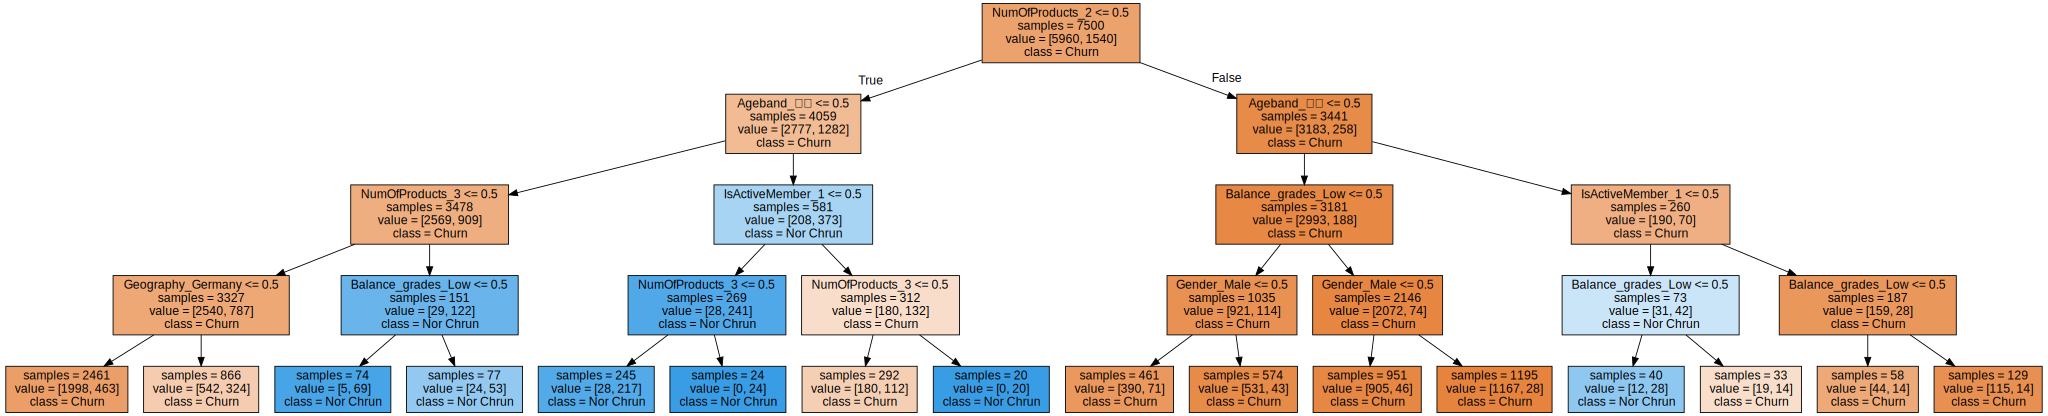

In [ ]:
#graphviz 라이브러리를 이용하여 의사결정나무 그리기 
from sklearn.tree import export_graphviz
import graphviz

# filled = True: 색상의 진하기로 클래스를 나타냄, impurity: 불순도 계산값 보여주기 옵션
export_graphviz(tree, out_file="tree.dot", class_names=[ "Churn", "Nor Chrun"],
                feature_names=df_new2.columns[1:], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [ ]:
result = tree.feature_importances_
print("변수의 중요도:\n", result)

변수의 중요도:
 [0.06934876 0.         0.00603641 0.33808331 0.17072762 0.
 0.         0.13082365 0.25892208 0.         0.         0.02605817
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]


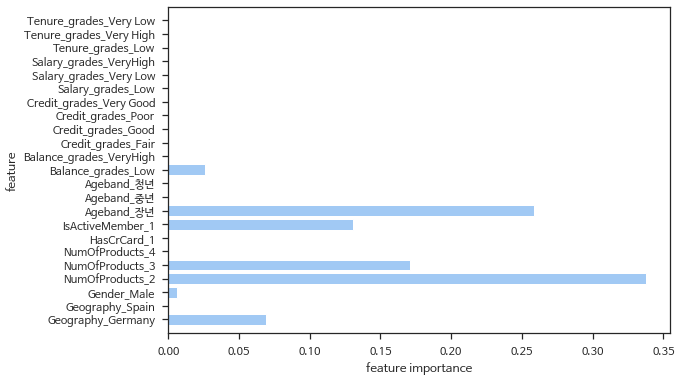

In [ ]:
import numpy as np

def plot_feature_importances_df(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(df_new2.columns[1:])  # 30개 
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), df_new2.columns[1:])   # 30개의 눈금을 표시하고 눈금 레이블을 변수 이름으로 지정
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) #Y 축 범위 지정 (-1 ~ 30)

plot_feature_importances_df(tree)

- EDA에서 알아본 내용과 비슷한 결과 도출
- [가입 상품수 2개] -> 이탈률 낮음
- [장년층],[가입 상품 수 3개],[활성 멤버], [독일 거주] -> 이탈률 높음
- 위의 요인들이 이탈률에 높은 영향을 미침을 알 수 있음

### 랜덤포레스트

In [ ]:
# 변수를 모두 이용하여 100개의 나무 생성 (정확도가 높아짐)

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.955
시험용 데이터 세트 정확도: 0.826


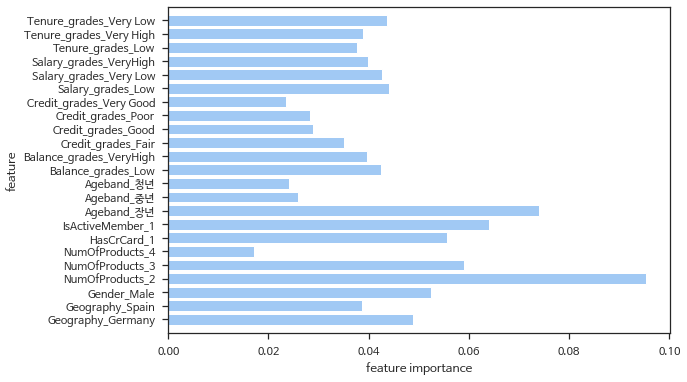

In [ ]:
# 단일 의사결정나무의 경우보다 많은 변수(feature)들이 사용됨
plot_feature_importances_df(forest)

- EDA에서 알아본 내용과 비슷한 결과 도출
- [가입 상품수 2개] -> 이탈률 낮음
- [장년층],[활성 멤버],[가입 상품 수 3개], [남성], [독일 거주] -> 이탈률 높음
- 위의 요인들이 이탈률에 높은 영향을 미침을 알 수 있음

In [ ]:
from sklearn.model_selection import cross_val_score

# 교차 검증을 10번 수행하여 10번의 교차 검증 평균 정확도를 비교 (10-fold cross validation)
# default cv=5

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean()))

Accuracy
Decision tree:  [0.84933333 0.832      0.83866667 0.82666667 0.84666667 0.848
 0.84266667 0.84133333 0.83733333 0.82933333]
Random forest:  [0.83333333 0.81866667 0.80666667 0.82933333 0.832      0.83466667
 0.80666667 0.81866667 0.804      0.812     ]
Accuracy mean
Decision tree :0.839
Random forest :0.820


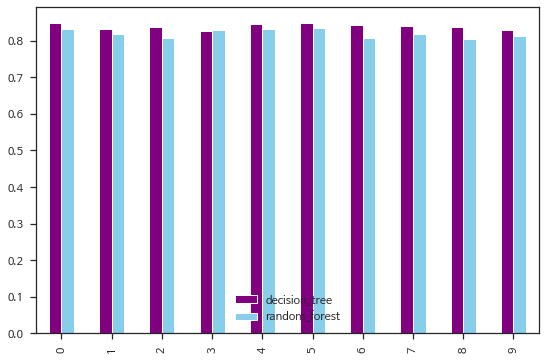

In [ ]:
cv_list = [    
            ['decision_tree',dt_scores],
            ['random_forest',rf_scores],
          ]
df = pd.DataFrame.from_dict(dict(cv_list))


df.plot(kind = 'bar', color = ['purple','skyblue'])

### 그래디언트부스팅

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# 기본값은 max_depth= 3, n_estimators=100, learning_rate = 0.1

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [ ]:
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.852
시험용 데이터 세트 정확도: 0.849


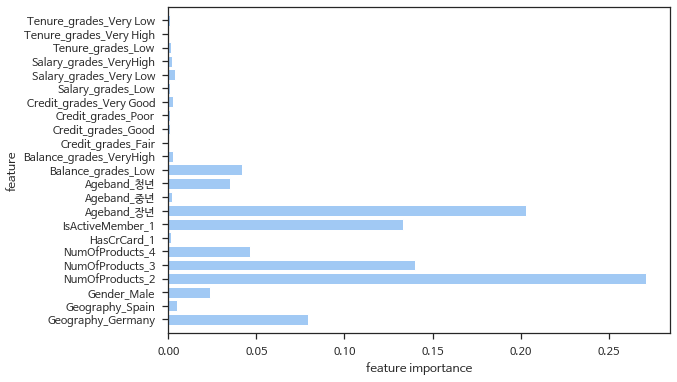

In [ ]:
plot_feature_importances_df(gbrt)

- 과적합 없이 세가지 모델 중 정확도가 가장 높음

# Part4. 분류모델 평가 👾

In [ ]:
# 교차 검증을 10번 수행하여 10번의 교차 검증 평균 정확도를 비교 (10-fold cross validation)
# default cv=5

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')
gbrt_scores = cross_val_score(gbrt, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 
print("Gradient boosting: ", gbrt_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean())) 

Accuracy
Decision tree:  [0.84933333 0.832      0.83866667 0.82666667 0.84666667 0.848
 0.84266667 0.84133333 0.83733333 0.82933333]
Random forest:  [0.83333333 0.81866667 0.80666667 0.82933333 0.832      0.83466667
 0.80666667 0.81866667 0.804      0.812     ]
Gradient boosting:  [0.86       0.84933333 0.852      0.83466667 0.85733333 0.85066667
 0.85066667 0.84       0.84266667 0.844     ]
Accuracy mean
Decision tree :0.839
Random forest :0.820
Gradient boosting :0.848


In [ ]:
# 교차 검증 상세 옵션 지정

# KFold :기본값 n_splits=5, shuffle=None (데이터를 임의로 섞지 않음) 
# LeaveOneOut :데이터 1개를 검증에 이용 
# ShuffleSplit :임의 분할, 전체 데이터를 모두 사용하지 않을 수도 있음
# GroupKFold :그룹을 지정해서 같은 그룹의 데이터는 학습용 또는 검증용으로 동일하게 분할
# StratifiedKFold :각 fold마다 클래스의 분포가 동일하도록 분할 (예. 악성:양성) 
# RepeatedStratifiedKFold: 교차검증을 반복, 기본값 n_repeats =10

from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=10)
#from sklearn.model_selection import RepeatedStratifiedKFold
#kf = RepeatedStratifiedKFold(n_splits=10)

print(kf)

dt_scores = cross_val_score(tree, X_train, y_train, cv=kf, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=kf, scoring='accuracy')
gbrt_scores = cross_val_score(gbrt, X_train, y_train, cv=kf, scoring='accuracy')

print("Accuracy mean -- StratifiedKFold 이용")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean())) 

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
Accuracy mean -- StratifiedKFold 이용
Decision tree :0.839
Random forest :0.820
Gradient boosting :0.848


- Gradient boosting > Random forest > Decision tree 순으로 정확도가 높음을 알 수 있다.

# Part5. 군집화

In [ ]:
# 데이터 처리를 위한 라이브러리
import numpy as np
import pandas as pd
# 데이터 시각화를 위한 라이브러리
from matplotlib.colors import ListedColormap
import matplotlib as mat
from matplotlib import font_manager
import matplotlib.pyplot as plt    
import seaborn as sns
# 데이터 분석을 위한 라이브러리
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from yellowbrick.cluster import KElbowVisualizer
# 경고메시지 생략을 위한 라이브러리
import warnings
# Rich output을 쉘에서 출력하기 위한 설정
%matplotlib inline

In [ ]:
#Importing the Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
np.random.seed(42)

### 데이터스케일링

In [ ]:
#데이터 스케일링 :: StandardScaler()을 이용한 표준화
    
    #각 특성의 평균을 0, 분산을 1로 스케일링
    #최솟값과 최댓값의 크기를 제한하지 않음
    #회귀보다 분류에 유용
    #데이터를 정규분포로 만듦
    
scaler = StandardScaler()
scaler.fit(df_new2)
scaled_ds = pd.DataFrame(scaler.transform(df_new2),columns=df_new2.columns)
print("스케일링 완료")

스케일링 완료


### TSNE

In [ ]:
#tsne
# 2차원 t-SNE 임베딩

tsne_np = TSNE(n_components = 2).fit_transform(scaled_ds)
tsne_df = pd.DataFrame(tsne_np, columns = ['component 0', 'component 1'])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
tsne_df.describe().T

,count,mean,std,min,25%,50%,75%,max
component 0,10000.0,0.267698,42.727055,-92.692192,-29.840166,-1.103955,32.109208,97.307182
component 1,10000.0,-0.160626,45.068932,-100.560318,-30.748182,-2.554874,34.750597,105.038506


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


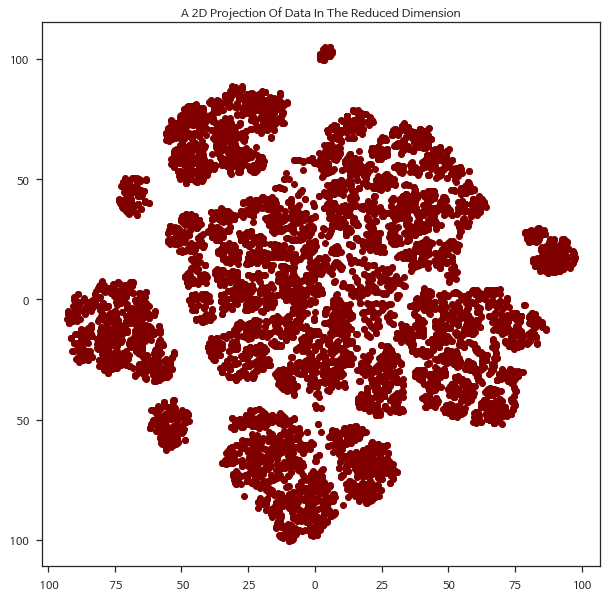

In [ ]:
#A 2D Projection Of Data In The Reduced Dimension
x =tsne_df["component 0"]
y =tsne_df["component 1"]

#To plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(x,y, c="maroon", marker="o" )
ax.set_title("A 2D Projection Of Data In The Reduced Dimension")
plt.show()

### Clustering

Elbow Method: 몇개의 클러스터를 만들어야 할까?


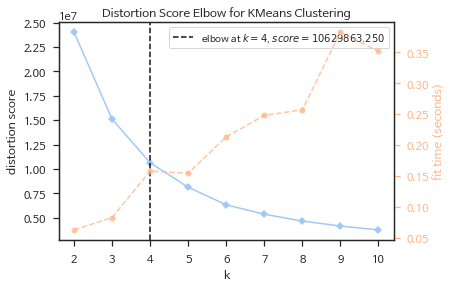

In [ ]:
#클러스터링

# 엘보우 기법 (Elbow Method)을 사용하여 몇개의 클러스터를 만들지 확인
print('Elbow Method: 몇개의 클러스터를 만들어야 할까?')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(tsne_df)
Elbow_M.show()

#4개의 클러스터를 만들면 됨

In [ ]:
#4개로 클러스터링 모델 시작
AC = AgglomerativeClustering(n_clusters=4)

# fit model and predict clusters
yhat_AC = AC.fit_predict(tsne_df)
tsne_df["Clusters"] = yhat_AC
df_new["Clusters"]= yhat_AC

In [ ]:
#To plot some selected features 
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", 'lightcoral']

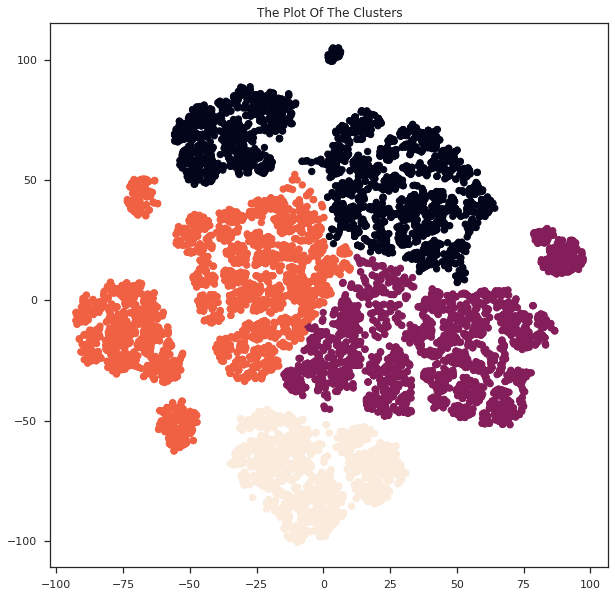

In [ ]:
#클러스터가 어떻게 구성됐는지 확인을 위해 3D plot으로 확인
#Plotting the clusters
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111, label="bla")
ax.scatter(x, y,s=40, c=tsne_df["Clusters"], marker='o')
ax.set_title("The Plot Of The Clusters")
plt.show()

### 군집별 특징 확인

In [ ]:
ds = df_new

In [ ]:
ds.head()

,Geography,Gender,NumOfProducts,HasCrCard,IsActiveMember,Exited,Ageband,Balance_grades,Tenure_grades,Credit_grades,Salary_grades,Clusters
0,France,Female,1,1,1,1,중년,Low,Very Low,Fair,High,2
1,Spain,Female,1,0,1,0,중년,Low,Very Low,Fair,High,2
2,France,Female,3,1,0,1,중년,VeryHigh,Very High,Poor,High,1
3,France,Female,2,0,0,0,중년,Low,Very Low,Good,Low,1
4,Spain,Female,1,1,1,0,중년,High,Very Low,Exceptional,Low,2


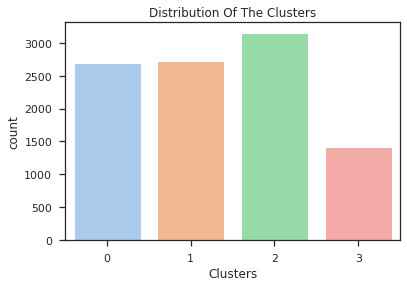

<Figure size 1440x720 with 0 Axes>

In [ ]:
# 그룹 별로 몇명 씩 분포되어있는지 확인
pl = sns.countplot(x=ds["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.figure(figsize = (20,10))
plt.show()

#2번 그룹에 해당되는 고객의 수가 가장 많고 3번 그룹에 해당되는 고객의 수가 가장 적음

In [ ]:
ds_0 = ds[ds["Clusters"] == 0]

print(ds_0.shape)

ds_1 = ds[ds["Clusters"] == 1]

print(ds_1.shape)

ds_2 = ds[ds["Clusters"] == 2]

print(ds_2.shape)

ds_3 = ds[ds["Clusters"] == 3]

print(ds_3.shape)

(2698, 12)
(2726, 12)
(3158, 12)
(1418, 12)


In [ ]:
ds

,Geography,Gender,NumOfProducts,HasCrCard,IsActiveMember,Exited,Ageband,Balance_grades,Tenure_grades,Credit_grades,Salary_grades,Clusters
0,France,Female,1,1,1,1,중년,Low,Very Low,Fair,High,2
1,Spain,Female,1,0,1,0,중년,Low,Very Low,Fair,High,2
2,France,Female,3,1,0,1,중년,VeryHigh,Very High,Poor,High,1
3,France,Female,2,0,0,0,중년,Low,Very Low,Good,Low,1
4,Spain,Female,1,1,1,0,중년,High,Very Low,Exceptional,Low,2
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,France,Male,2,1,0,0,중년,Low,Low,Very Good,Low,2
9996,France,Male,1,1,1,0,중년,Low,Very High,Poor,High,0
9997,France,Female,1,0,1,1,중년,Low,High,Good,Very Low,1
9998,Germany,Male,2,1,0,1,중년,Low,Very Low,Very Good,Low,2


In [ ]:
# 청년 -> Youth
# 중년 -> MiddleAge
# 장년 -> Senior
# 노년 -> Eldery

ds = ds.replace('청년', 'Youth')
ds = ds.replace('중년', 'MiddleAge')
ds = ds.replace('장년', 'Senior')
ds = ds.replace('노년', 'Eldery')


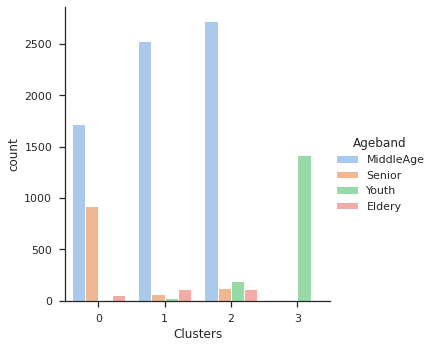

In [ ]:
sns.catplot(kind='count', data=ds, x='Clusters', hue="Ageband")

- 그룹0은 중장년층으로 이루어져있음
- 그룹 1,2는 중년층으로 이루어져있음
- 그룹3은 청년으로만 이루어져있음

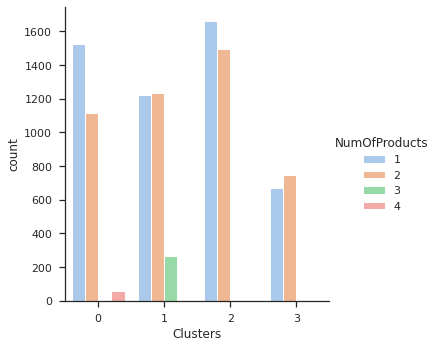

In [ ]:
sns.catplot(kind='count', data=ds, x='Clusters', hue="NumOfProducts")

- 그룹0은 상품 가입수가 4개인 사람들이 포함되어 있음
- 그룹1은 상품가입수가 3개인 사람들이 포함되어 있음

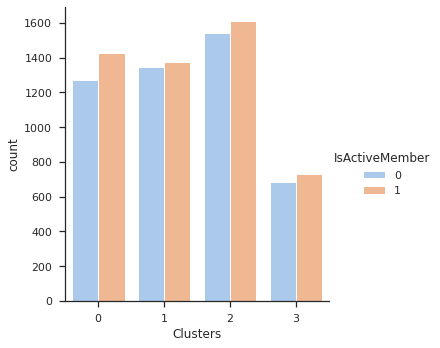

In [ ]:
sns.catplot(kind='count', data=ds, x='Clusters', hue="IsActiveMember")

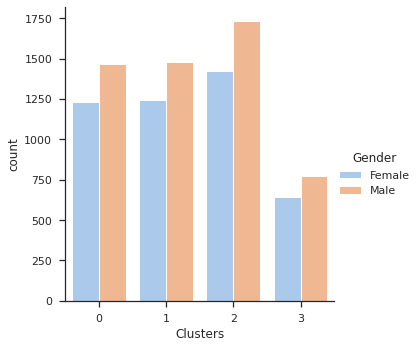

In [ ]:
sns.catplot(kind='count', data=ds, x='Clusters', hue="Gender")

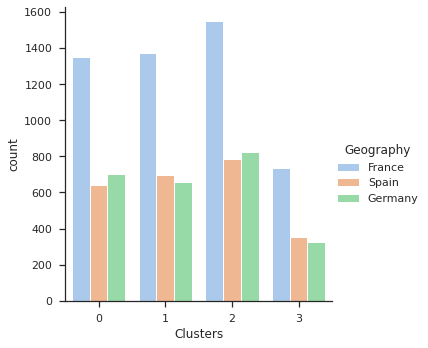

In [ ]:
sns.catplot(kind='count', data=ds, x='Clusters', hue="Geography")

- 4그룹의 거주지 비율은 비슷한 편 이지만, 그룹0과 그룹2는 독일에 거주하는 사람들이 그룸 1과 그룹3에 비해 상대적으로 많음

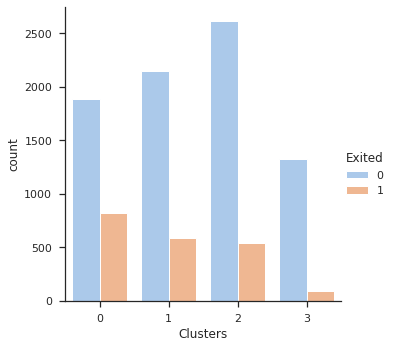

In [ ]:
sns.catplot(kind='count', data=ds, x='Clusters', hue="Exited")

- 그룹0은 이탈한 고객들이 많이 포함되어있음
- 그룹3은 대부분 이탈하지 않은 고객들로 구성되어있음